In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import tensorflow
import datetime
import cv2
import os
tensorflow.__version__

'2.13.0'

In [5]:
! git clone https://github.com/ijrios/Leukemia_Classification

Cloning into 'Leukemia_Classification'...
remote: Enumerating objects: 790, done.
remote: Counting objects: 100% (790/790), done.
remote: Compressing objects: 100% (760/760), done.
remote: Total 790 (delta 27), reused 785 (delta 26), pack-reused 0
Receiving objects: 100% (790/790), 10.73 MiB | 24.53 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [20]:
data_dir = '/content/Leukemia_Classification/data/images/Original'
class_labels = os.listdir(data_dir)  #Lista de carpetas, cada una representando una clase

images = []
labels = []

width = 224 #Ancho en píxeles
height = 224 #Altura en píxeles


for label, class_name in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (width, height))
            image = image / 255.0  #Normalización valores de píxeles al rango [0, 1]
            images.append(image)
            labels.append(label)
        else:
            print(f"Error al cargar la imagen: {image_path}")

images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [21]:
#CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # Four classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Train model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
10/10 [==============================] - 43s 4s/step - loss: 5.5122 - accuracy: 0.2937 - val_loss: 1.2828 - val_accuracy: 0.3125
Epoch 2/10
10/10 [==============================] - 31s 3s/step - loss: 1.0998 - accuracy: 0.4406 - val_loss: 1.0204 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 31s 3s/step - loss: 0.7145 - accuracy: 0.7250 - val_loss: 0.9337 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 33s 3s/step - loss: 0.4438 - accuracy: 0.8281 - val_loss: 0.7862 - val_accuracy: 0.6375
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 0.1986 - accuracy: 0.9438 - val_loss: 1.2365 - val_accuracy: 0.5875
Epoch 6/10
10/10 [==============================] - 31s 3s/step - loss: 0.1214 - accuracy: 0.9688 - val_loss: 1.1539 - val_accuracy: 0.6250
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.0714 - accuracy: 0.9844 - val_loss: 0.8259 - val_accuracy: 0.6875
Epoch 8/10
10/10 [==

In [28]:
Test_org = '/content/Leukemia_Classification/data/images/Original/Benign/WBC-Benign-001.jpg'

light_orange = (168, 50, 50)
dark_orange = (182, 255, 255)

image = cv2.imread(Test_org)
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(image, light_orange, dark_orange)
result = cv2.bitwise_and(image, image, mask=mask)
result = cv2.resize(result, (224, 224))
image_name = Test_org.split(sep='/')[-1]
Test_seg = f'/content/Test-images/Seg-{image_name}'
cv2.imwrite(Test_seg, result)

True

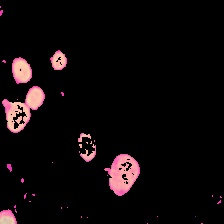

In [33]:
from IPython.display import Image, display

image_path = '/content/Test-images/Seg-WBC-Benign-001.jpg'
display(Image(filename=image_path))

In [34]:
def input_samples (TEST):
    test_img = tensorflow.keras.preprocessing.image.load_img(TEST, target_size=(224, 224))
    x = tensorflow.keras.preprocessing.image.img_to_array(test_img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    images = np.vstack([x])
    return images

In [42]:
categories = ['Benign', 'Early', 'Pre', 'Pro']

Test_org = input_samples('/content/Leukemia_Classification/data/images/Original/Benign/WBC-Benign-001.jpg')
Test_seg = input_samples('/content/Test-images/Seg-WBC-Benign-001.jpg')

# Realiza la predicción de clase
start_time = datetime.datetime.now()

classes = model.predict([Test_org, Test_seg])
predicted_class = np.argmax(classes, axis=1)

end_time = datetime.datetime.now()
elapsed_time = end_time - start_time


1/1 [==============================] - 0s 25ms/step
